## BIA Bob demo
BIA Bob is a Jupyter-magic based assistant for interacting with data via code. 

In [1]:
from bia_bob import bob
bob.__version__

'0.3.1'

You can use the `%bob` single-line or the `%%bob` multi-line magic to ask for programming image analysis tasks and `bob` will do it for you.

In [2]:
%bob Load the blobs.tif image file and show it.

To load the "blobs.tif" image file and display it, you can use the following code:

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
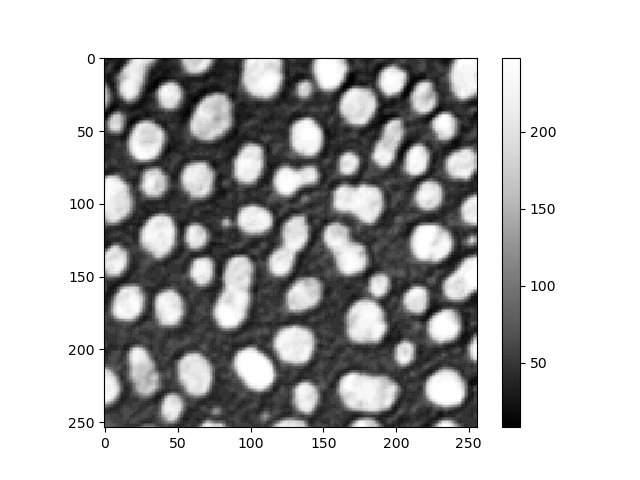
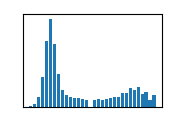

In [3]:
from skimage.io import imread
import stackview

# Load the image
image = imread("blobs.tif")

# Display the image
stackview.insight(image)

In [4]:
%%bob
Load the blobs.tif grayscale image from disc.
Segment the nuclei-like objects in it using 
Otsu's method and connected component labeling.
Measure area of the segmented labels.
Print the area on top of the labels.

To perform the requested tasks on the "blobs.tif" image, including loading the image, segmenting the nuclei-like objects using Otsu's method and connected component labeling, measuring the area of the segmented labels, and printing the area on top of the labels, you can use the following code:

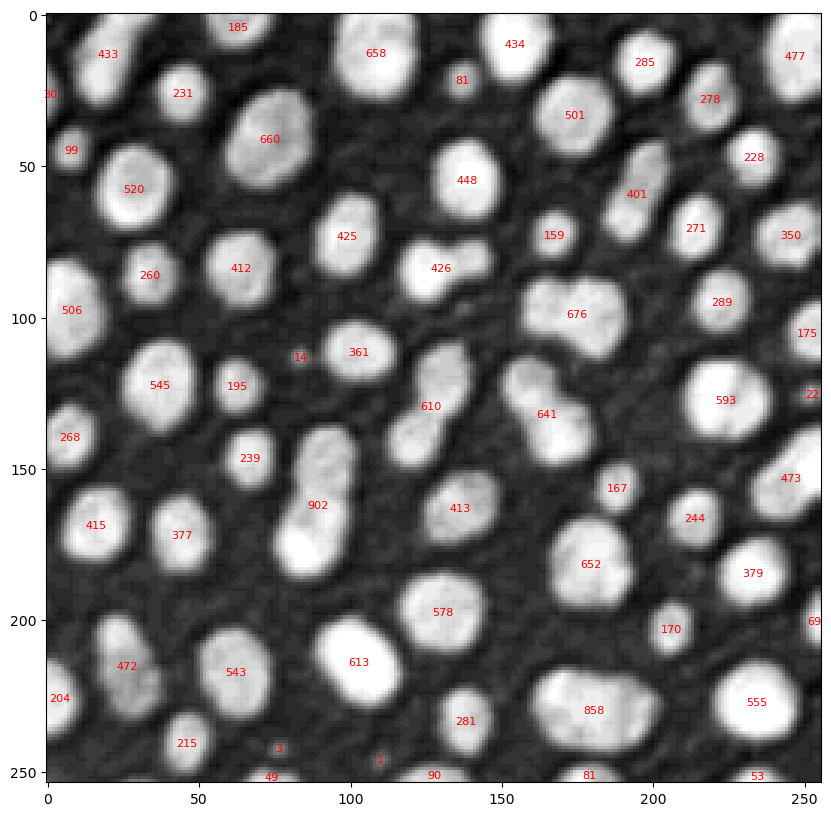

In [5]:
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

# Load the image
image = imread("blobs.tif")

# Threshold using Otsu's method
threshold = threshold_otsu(image)
binary = image > threshold

# Perform connected component labeling
labels = label(binary)

# Measure area of the segmented labels
props = regionprops(labels)
areas = [prop.area for prop in props]

# Display the image with area labels
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image, cmap='gray')

for prop in props:
    y, x = prop.centroid
    area = prop.area
    ax.text(x, y, f"{area}", color='red', ha='center', va='center', fontsize=8)

plt.show()